# <center> Basic Statistics and Plotting

<center> 28.5.2020

<center> Mónika Farsang

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Loading data

In [2]:
file = "Monika_Farsang_dataset.csv"
df = pd.read_csv(file)
df

,Year for temperature difference,Annual temp difference (°C),Annual temp difference smooth (°C),Year.Month for CO2,CO2 (ppm),Year for Arctic sea ice extent,Arctic sea ice extent (million square km),Person ID number,Gender,Daily fruit/veggies,Daily stress (0-5),Number of close friends,Number of social interactions per day,Sleeping hours
0,1880.0,-0.16,-0.09,1958.03.01,314.62,1979.0,7.05,10001.0,Female,3.0,2.0,5.0,5.0,7.0
1,1881.0,-0.08,-0.12,1958.04.01,315.29,1980.0,7.67,10002.0,Female,2.0,3.0,3.0,10.0,8.0
2,1882.0,-0.10,-0.16,1958.05.01,314.71,1981.0,7.14,10003.0,Female,2.0,3.0,4.0,10.0,8.0
3,1883.0,-0.16,-0.19,1958.06.01,314.85,1982.0,7.30,10004.0,Female,3.0,3.0,3.0,7.0,5.0
4,1884.0,-0.28,-0.23,1958.07.01,314.98,1983.0,7.39,10005.0,Female,5.0,1.0,3.0,4.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,NaN,NaN,NaN,2019.12.01,412.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
742,NaN,NaN,NaN,2020.01.01,413.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
743,NaN,NaN,NaN,2020.02.01,413.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
744,NaN,NaN,NaN,2020.03.01,413.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Mean

In [ ]:
#using mean on each column
df.mean()

In [ ]:
#using mean on column Number of close friends
mean_friends = df["Number of close friends"].mean()
print(mean_friends)

### Median

In [ ]:
#get the median on Number of close friends
median_friends = df["Number of close friends"].median()
print(median_friends)

### Mode

In [ ]:
#get the mode on Number of close friends
mode_friends = df["Number of close friends"].mode()
print(mode_friends)

### Moving average

In [ ]:
#using the column CO2 (ppm)
#CO2 (ppm) without any modification
print(df["CO2 (ppm)"])

In [ ]:
#CO2 (ppm) with rolling average with window size 2
rolling_mean_CO2=df["CO2 (ppm)"].rolling(window=2, min_periods=1).mean()
print(rolling_mean_CO2)

### Standard deviation

In [ ]:
#Standart deviation for the whole data set
df_std = np.std(df)
print(df_std)

In [ ]:
#Standart deviation for the 
daily_stress = np.std(df["Daily stress (0-5)"])
print(daily_stress)

### Minimum

In [ ]:
#Minimum of Number of social interactions per day
min(df["Number of social interactions per day"])

### Maximum

In [ ]:
#Maximum of Number of social interactions per day
max(df["Number of social interactions per day"])

### Quartile

In [ ]:
#Summary about the whole dataset with the quartile values
df.describe()

### Sum

In [ ]:
#Sum of Sleeping hours (this column has NaN values)
np.nansum(df["Sleeping hours"]) 

### Cumulative sum

In [ ]:
#Create cumulative sum for Daily fruit/veggies, Number of close friends, Sleeping hours
cumsum_columns = df[["Daily fruit/veggies", "Number of close friends", "Sleeping hours"]]

cumsum_habits = np.cumsum(cumsum_columns, axis = 0)
print(cumsum_habits)

### Counting/length

In [ ]:
#We want to know how many people sleep more than 8 hours 
df_sleep = df["Sleeping hours"]
len(df_sleep[df_sleep > 8])

### Variance

In [ ]:
#Variance of the Sleeping hours
np.nanvar(df["Sleeping hours"])

### Covariance

In [ ]:
#Get the covariance between the Daily stress and the Sleeping hours
#Covanriance matrix as a dataframe
cov = df[["Daily stress (0-5)" , "Sleeping hours"]].cov()

#Get the covariance value
cov["Daily stress (0-5)"]["Sleeping hours"]

### Pivot table

In [ ]:
#Pivot table to get information about temperature difference during the years
pivot1 = df.pivot_table(values = "Annual temp difference (°C)", index= "Year for temperature difference")
print(pivot1)

In [ ]:
# Pivot on two variables, to get information on the relationship of Daily stress and Daily fruit/veggies along the different people
pivot2 = df.pivot_table(values= 'Daily fruit/veggies', index='Person ID number', columns='Daily stress (0-5)')
print(pivot2)

### Histogramm

In [ ]:
#Frequency of Number of close friends by dividing it into 5 bins
friends = df["Number of close friends"]
friends_without_nan = friends[~np.isnan(friends)]
plt.hist(friends_without_nan, 5)
plt.show()

### Bar plot

In [ ]:
#Bar plot of Annual temp difference (°C) during the years
plt.bar(df["Year for temperature difference"], df["Annual temp difference (°C)"])

# Changing the labels
plt.xlabel("Year")  
plt.ylabel("Annual temp difference (°C)")
plt.show() 

### Box plot

In [ ]:
#Daily fruit/veggies, Daily stress (0-5), Number of close friends, Number of social interactions per day, Sleeping hours
fruit=df["Daily fruit/veggies"]  
data1 = fruit[~np.isnan(fruit)]

stress = df["Daily stress (0-5)"]
data2 = stress[~np.isnan(stress)]

friends=df["Number of close friends"]  
data3 = friends[~np.isnan(friends)]

social=df["Number of social interactions per day"]  
data4 = social[~np.isnan(social)]

sleep=df["Sleeping hours"]  
data5 = sleep[~np.isnan(sleep)]

box_plot_data=[data1, data2, data3, data4, data5]
plt.boxplot(box_plot_data, labels=["fruit","stress","friends","social","sleep"])

plt.show()

### Line plot

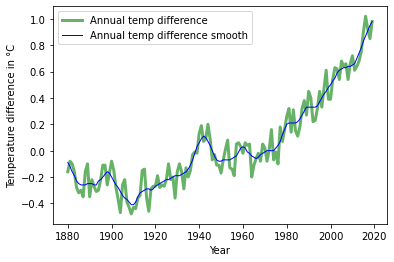

In [3]:
#Line plot for the Annual temperature difference and the Annual temperature difference smooth during the years
plt.plot(df["Year for temperature difference"], df["Annual temp difference (°C)"], color= "green", linewidth=3, alpha = 0.6, label='Annual temp difference')
plt.plot(df["Year for temperature difference"], df["Annual temp difference smooth (°C)"], color= "blue", linewidth=1, label='Annual temp difference smooth')
plt.xlabel('Year')  
plt.ylabel('Temperature difference in °C')
plt.legend() 

#Saving figure to my report
plt.savefig('TempDiff.png', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
#Line plot for the CO2 concentration
date = pd.to_datetime(df["Year.Month for CO2"], format="%Y.%m.%d")
plt.plot(date, df["CO2 (ppm)"], color= "black", label='Annual temp difference')
plt.xlabel('Year')  
plt.ylabel('CO2 (ppm)')
plt.show()

In [ ]:
#Line plot for the Arctic sea ice extent
plt.plot(df["Year for Arctic sea ice extent"], df["Arctic sea ice extent (million square km)"], color= "blue", label='Annual temp difference')
plt.xlabel('Year')  
plt.ylabel('Arctic sea ice extent (million square km)')
plt.show()

### Scatter plot

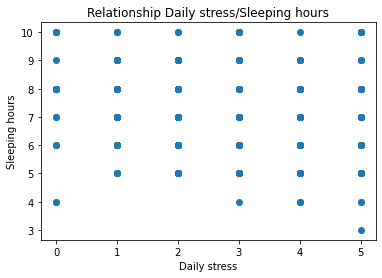

In [4]:
#Scatter plot to see the connection between Daily stress and Sleeping hours
#From this plot we can see that with 3, 4, 5 hours sleep time the daily stress is always higher than zero (except in one case with 4 hours and 0 stress)
plt.scatter(df["Daily stress (0-5)"], df["Sleeping hours"])
plt.title('Relationship Daily stress/Sleeping hours')
plt.xlabel('Daily stress')
plt.ylabel('Sleeping hours')
plt.show()

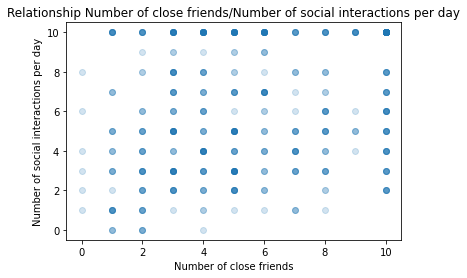

In [6]:
#Get information about the impact of the large number of close friends on the number of daily social interactions
#From this plot we can see that with more than 4 close friends, the number of daily interactions are at least 1
#Another interesting thing is that even with a small number of close friends you can get a high number of daily social interaction 
plt.scatter(df["Number of close friends"], df["Number of social interactions per day"], alpha=0.2)
plt.title('Relationship Number of close friends/Number of social interactions per day')
plt.xlabel('Number of close friends')
plt.ylabel('Number of social interactions per day')
plt.show()